In [1]:
from sensor_network_utils import * 

In [ ]:
# Load data
flowdata_paths = ['data/dailyflow_v3_1.csv', 'data/dailyflow_v3_2.csv']
df_cleaned, gauges_gdf, flowlines_gdf, usgs_index_df = load_data(
    flowdata_paths,
    'data/gage_12_shpaefile/SWIM_gage_loc_12.shp',
    'data/tx_gulf_flowlines/flowlines.shp',
    'data/gage_12.csv'
)

In [3]:
# Prepare USGS indices
usgs_location, usgs_number, columns_to_keep = prepare_usgs_indices(df_cleaned, usgs_index_df)


In [4]:
# Split data
X_train, X_test = split_data(df_cleaned.values)


In [5]:
# Get sensor placement from QR
sensor_location = sensor_placement_qr(X_train, usgs_number)


In [6]:
# Evaluate both configurations
_, recon_opt, _, _, _, _ = reconstruction_evaluation(X_train, X_test, sensor_location, usgs_number)
_, recon_usgs, _, _, _, _ = reconstruction_evaluation(X_train, X_test, usgs_location, usgs_number)


In [7]:
# Calculate performance

_, _, nnse_opt = calculate_performance_metrics(X_test, recon_opt)
_, _, nnse_usgs = calculate_performance_metrics(X_test, recon_usgs)
diff_nnse = nnse_opt - nnse_usgs


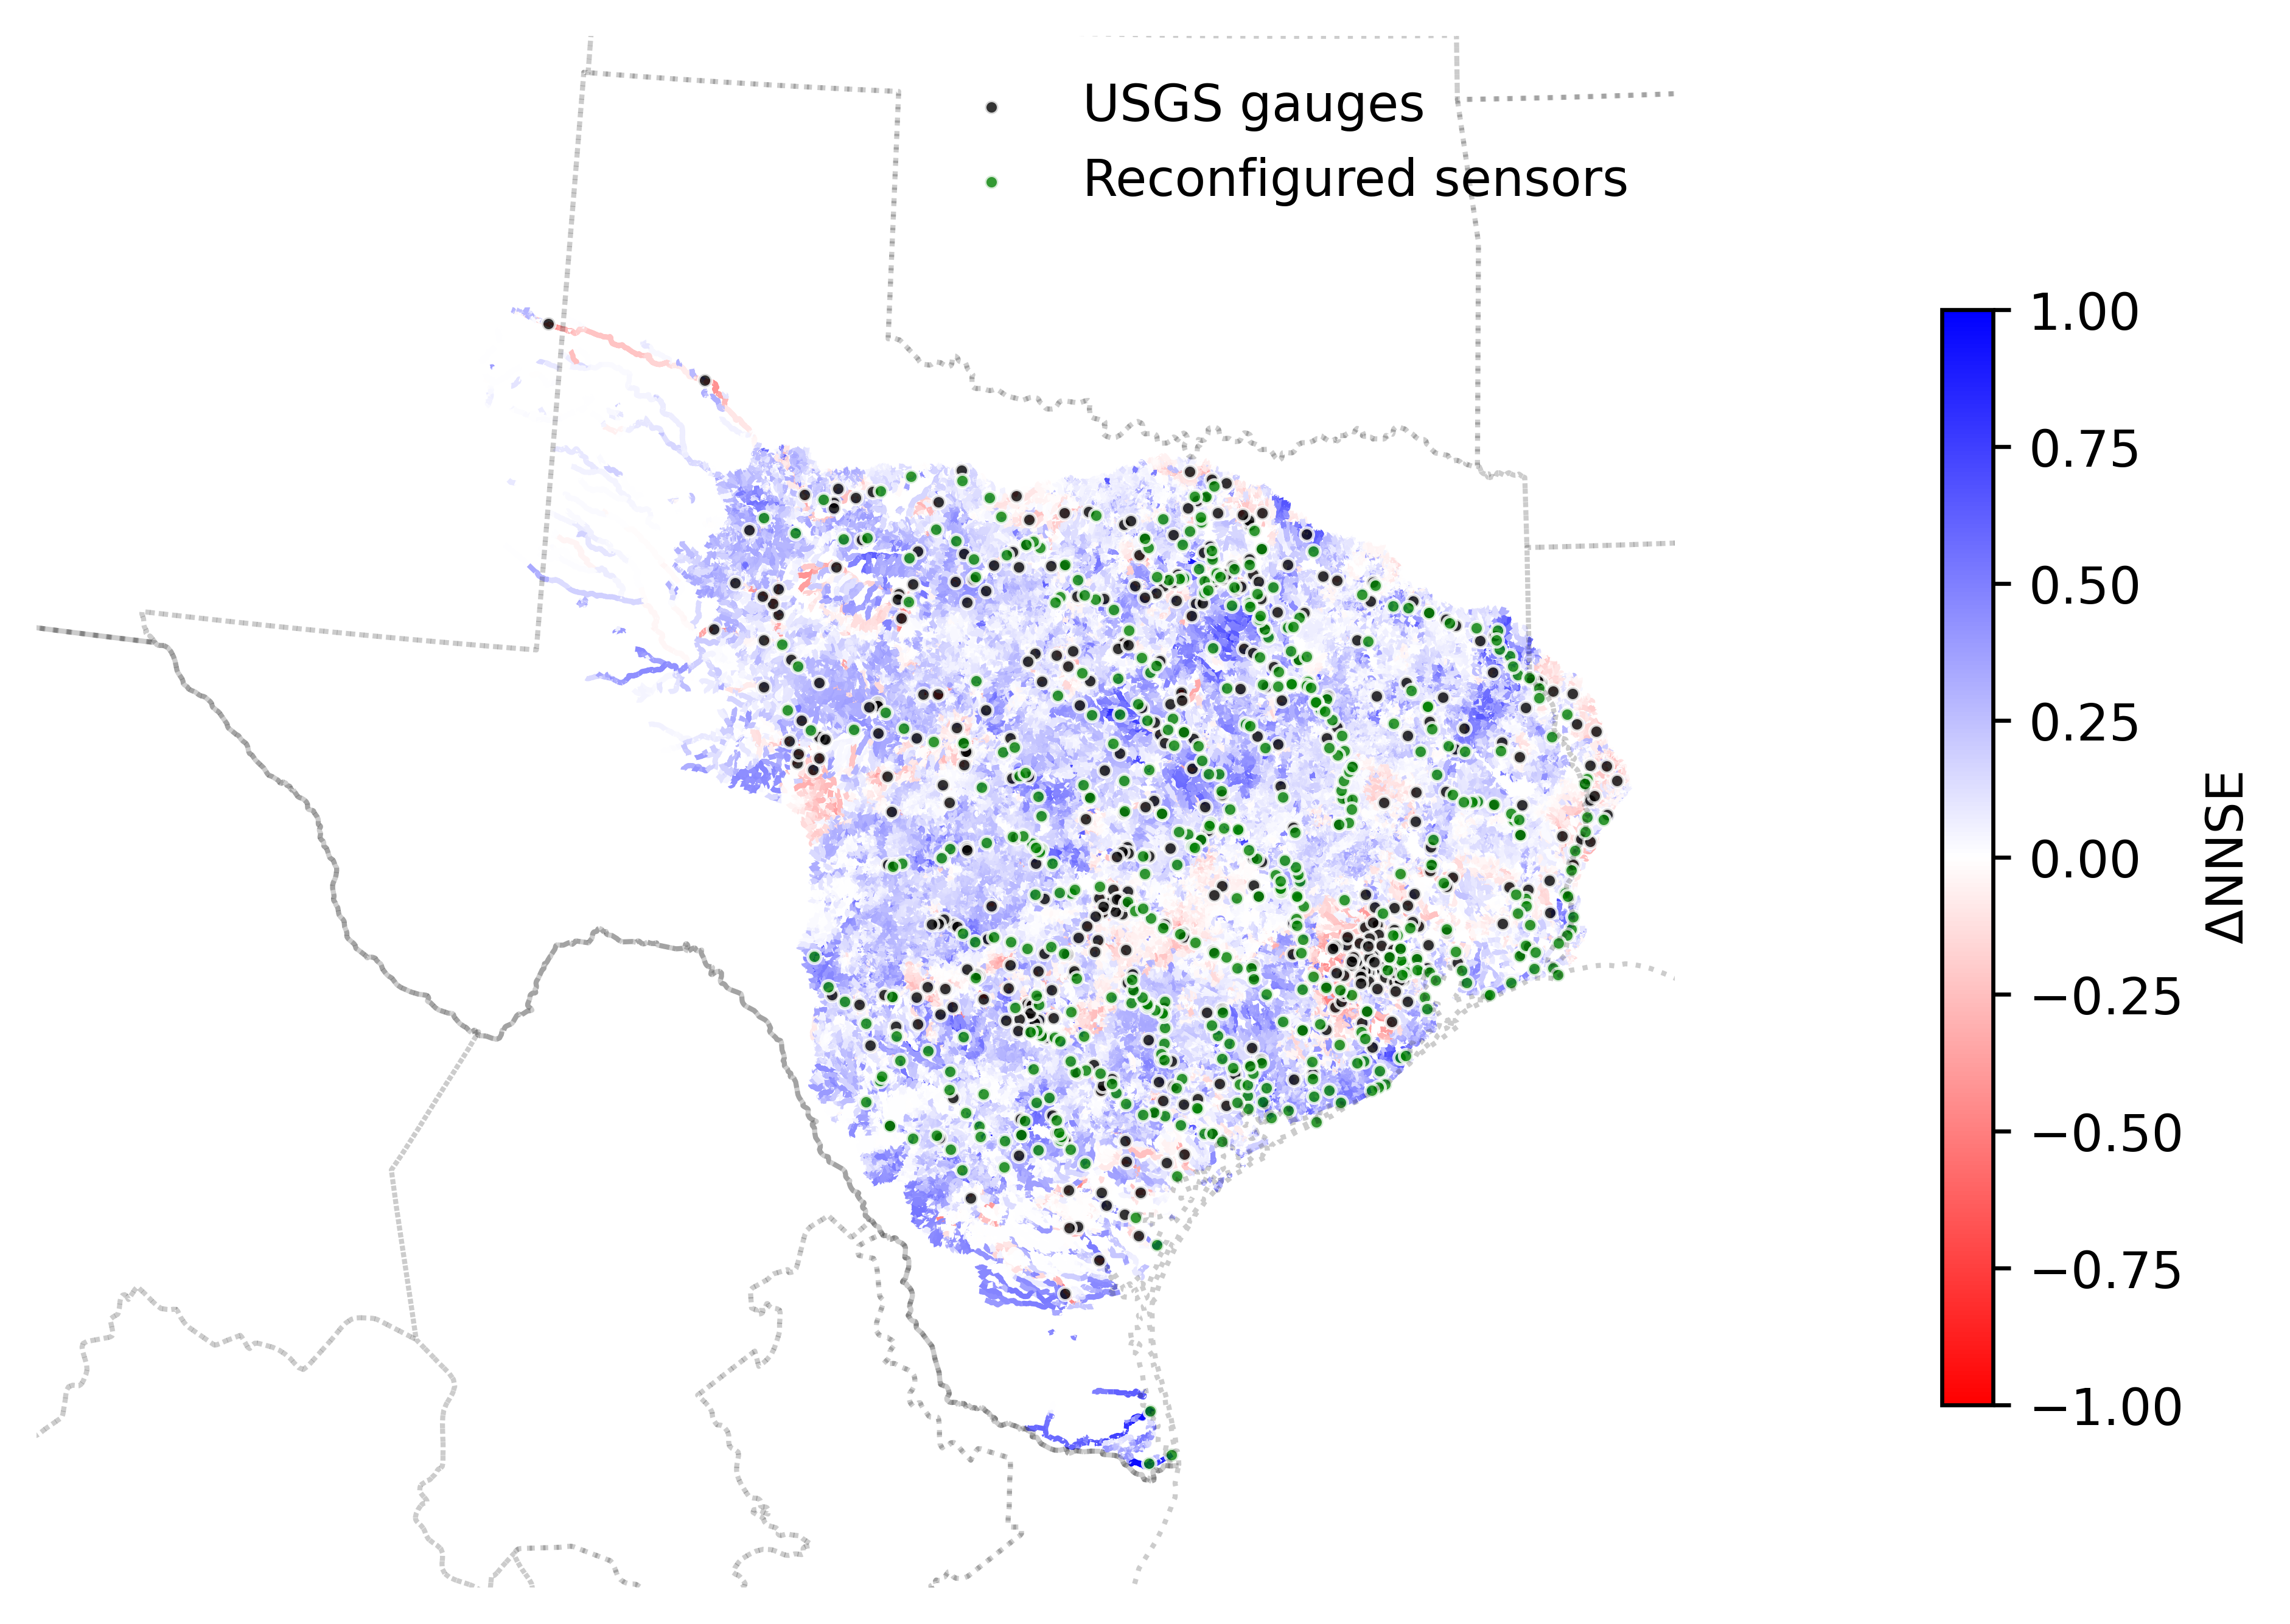

In [ ]:
# Visualization

flowlines_with_nnse, centroids = prepare_visualization_data(
    flowlines_gdf, 
    df_cleaned, 
    diff_nnse,
    {'usgs': usgs_location, 'opt': sensor_location},
    usgs_number
)

plot_sensor_network(flowlines_with_nnse, centroids, save_path='sensor_network.png')